# Tarea 2


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión No Lineal

In [2]:
data = np.genfromtxt('datosT2.txt', delimiter=' ')
x = data[:,0]
y = data[:,1]

# dividimos train y test en 75 y 25% respectivamente
x_tr = x[0:108];
y_tr = y[0:108];

x_te = x[108:144];
y_te = y[108:144];

### i) 
A continuación se grafica la data:

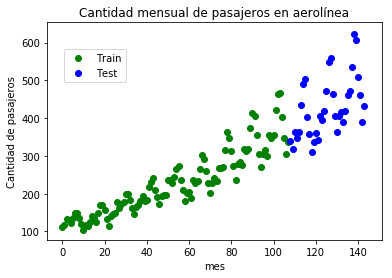

In [3]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.scatter(x_tr,y_tr, c ='g')
plt.scatter(x_te,y_te, c ='b')
plt.title("Cantidad mensual de pasajeros en aerolínea")
plt.xlabel("mes")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["Train","Test"], bbox_to_anchor=(0.25, 0.9))

### ii) 

Theta polyfit:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta formula:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta polyfit:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta formula:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]


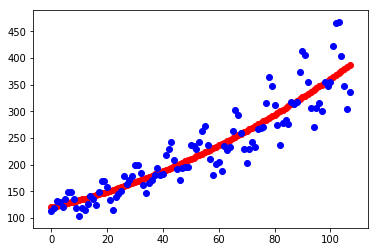

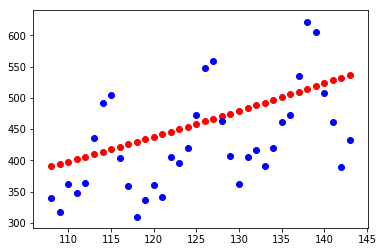

In [4]:
grado = 2
identity_size = grado + 1
x_tilda = np.array([x_tr, np.ones(len(x_tr))]).transpose()

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(x_tr,grado))[np.newaxis].transpose(), x_tilda, axis=1)

y_reg = y_tr

identidad = np.identity(identity_size)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta(rho)
    print("Theta polyfit: ", np.polyfit(x_tr,y_reg, grado))
    print("Theta formula: ", get_theta(0))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0

plt.figure()
plt.scatter(x_tr,poly(x_tr, rho), c ='r')
plt.scatter(x_tr,y_tr, c ='b')

plt.figure()
plt.scatter(x_te,poly(x_te, rho), c ='r')
plt.scatter(x_te,y_te, c ='b')

### iii)

In [32]:
coefs_pol = [0.012, 1.22, 120]

def f_pol_sin(x, theta):
    f_pol = np.poly1d(coefs_pol)
    
    return np.add(
        f_pol(x), 
        np.multiply(
            theta[0], 
            np.multiply(
                np.sin(
                    np.add(np.multiply(theta[1],x), 
                           theta[2])),
                np.exp(np.multiply(theta[3],x)))))

def cost_func(theta, x, y):
    f_pol_sin_aux = lambda t: f_pol_sin(t, theta)
    
    return np.sum(np.power(np.subtract(y, np.vectorize(f_pol_sin_aux)(x)), 2))

    
theta_1 = np.array([0.9, 0.5, 0.1, 0.01])

opt.minimize(cost_func, theta_1, args=(x_tr, y_tr), method='BFGS')

      fun: 36548.55439238251
 hess_inv: array([[ 2.73791990e-06,  1.47350104e-08, -1.38054334e-06,
        -3.75062619e-09],
       [ 1.47350104e-08,  9.22991089e-10, -7.51346708e-09,
         3.38652439e-12],
       [-1.38054334e-06, -7.51346708e-09,  7.02994999e-07,
         1.43800767e-09],
       [-3.75062619e-09,  3.38652439e-12,  1.43800767e-09,
         9.03814164e-10]])
      jac: array([ 0.00048828, -0.0078125 ,  0.00048828,  0.00537109])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 28
     njev: 100
   status: 2
  success: False
        x: array([11.92024372,  0.52158016, -1.24788885,  0.01741584])

Graficamos el resultado de la optimización:

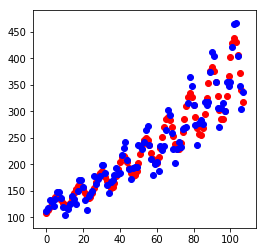

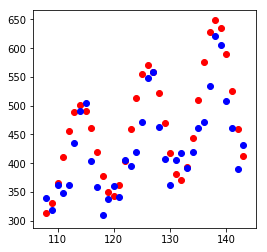

In [30]:
params_pol_sin = np.array([11.92024372,  0.52158016, -1.24788885,  0.01741584])

#pdb.set_trace()
plt.figure()
plt.scatter(x_tr,f_pol_sin(x_tr, params_pol_sin), c ='r')
plt.scatter(x_tr,y_tr, c ='b')

plt.figure()
plt.scatter(x_te,f_pol_sin(x_te, params_pol_sin), c ='r')
plt.scatter(x_te,y_te, c ='b')

### iv)

In [37]:
def f_theta_pol_sin_sin(x, theta):
    
    return np.add(
        f_pol_sin(x, params_pol_sin), 
        np.multiply(
            theta[0], 
            np.multiply(
                np.sin(
                    np.add(np.multiply(theta[1],x), 
                           theta[2])),
                np.exp(np.multiply(theta[3],x)))))

def cost_func_iv(theta, x, y):
    f_pol_sin_sin_aux = lambda t: f_theta_pol_sin_sin(t, theta)
    
    return np.sum(np.power(np.subtract(y, np.vectorize(f_pol_sin_sin_aux)(x)), 2))

theta_iv_init = np.array([1, 0.3, 0.2, 0.01])

opt.minimize(cost_func_iv, theta_iv_init, args=(x_tr, y_tr), method='BFGS')

      fun: 14312.16334633082
 hess_inv: array([[ 8.44390486e-06,  6.23433469e-08, -6.17934025e-06,
        -1.42336287e-08],
       [ 6.23433469e-08,  5.87545595e-09, -4.41175979e-07,
         1.43700068e-10],
       [-6.17934025e-06, -4.41175979e-07,  5.16435330e-05,
        -7.29468166e-09],
       [-1.42336287e-08,  1.43700068e-10, -7.29468166e-09,
         3.67434602e-09]])
      jac: array([-0.00292969, -1.32568359, -0.02929688,  0.10693359])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1659
      nit: 108
     njev: 274
   status: 2
  success: False
        x: array([8.85004028, 1.05319916, 0.4297977 , 0.01282708])

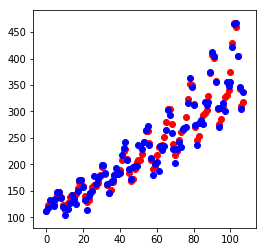

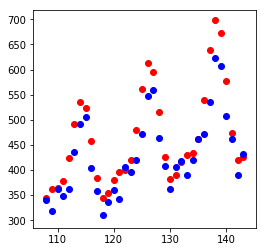

In [38]:
params_pol_sin_sin = np.array([8.85004028, 1.05319916, 0.4297977 , 0.01282708])

plt.figure()
plt.scatter(x_tr,f_theta_pol_sin_sin(x_tr, params_pol_sin_sin), c ='r')
plt.scatter(x_tr,y_tr, c ='b')

plt.figure()
plt.scatter(x_te,f_theta_pol_sin_sin(x_te, params_pol_sin_sin), c ='r')
plt.scatter(x_te,y_te, c ='b')